# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

In [ ]:
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip

--2023-04-07 23:08:40--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  15.9MB/s    in 23s     

2023-04-07 23:09:03 (12.8 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2023-04-07 23:09:03--  http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62010 (61K) [application/zip]
Saving to: ‘Stanford40_ImageSplits.zip’

Stanford40_ImageSpl 100%[===================>]  60.56K   115KB/s    in 0.5s    

2023-0

### Unzip it

In [ ]:
!unzip Stanford40_JPEGImages.zip -d Stanford40/
!unzip Stanford40_ImageSplits.zip -d Stanford40/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: Stanford40/JPEGImages/phoning_213.jpg  
  inflating: Stanford40/JPEGImages/phoning_214.jpg  
  inflating: Stanford40/JPEGImages/phoning_215.jpg  
  inflating: Stanford40/JPEGImages/phoning_216.jpg  
  inflating: Stanford40/JPEGImages/phoning_217.jpg  
  inflating: Stanford40/JPEGImages/phoning_218.jpg  
  inflating: Stanford40/JPEGImages/phoning_219.jpg  
  inflating: Stanford40/JPEGImages/phoning_220.jpg  
  inflating: Stanford40/JPEGImages/phoning_221.jpg  
  inflating: Stanford40/JPEGImages/phoning_222.jpg  
  inflating: Stanford40/JPEGImages/phoning_223.jpg  
  inflating: Stanford40/JPEGImages/phoning_224.jpg  
  inflating: Stanford40/JPEGImages/phoning_225.jpg  
  inflating: Stanford40/JPEGImages/phoning_226.jpg  
  inflating: Stanford40/JPEGImages/phoning_227.jpg  
  inflating: Stanford40/JPEGImages/phoning_228.jpg  
  inflating: Stanford40/JPEGImages/phoning_229.jpg  
  inflating: Stanford40/JPEGImages/phoning_230.jpg  
  inflating: Stanfo

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse", 
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1, random_state=12345, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['running_213.jpg', 'throwing_frisby_132.jpg', 'pouring_liquid_178.jpg', 'drinking_145.jpg', 'pouring_liquid_173.jpg', 'drinking_106.jpg', 'riding_a_bike_161.jpg', 'applauding_260.jpg', 'running_036.jpg', 'drinking_167.jpg', 'smoking_133.jpg', 'climbing_288.jpg', 'running_102.jpg', 'riding_a_horse_181.jpg', 'riding_a_horse_294.jpg', 'running_249.jpg', 'climbing_090.jpg', 'applauding_056.jpg', 'climbing_290.jpg', 'applauding_141.jpg', 'riding_a_horse_044.jpg', 'drinking_126.jpg', 'jumping_033.jpg', 'applauding_027.jpg', 'riding_a_bike_033.jpg', 'climbing_270.jpg', 'pouring_liquid_169.jpg', 'throwing_frisby_183.jpg', 'smoking_110.jpg', 'shooting_an_arrow_052.jpg', 'climbing_245.jpg', 'riding_a_horse_130.jpg', 'climbing_201.jpg', 'shooting_an_arrow_110.jpg', 'throwing_frisby_161.jpg', 'climbing_013.jpg', 'riding_a_bike_282.jpg', 'shooting_an_arrow_124.jpg', 'drinking_192.jpg', 'shooting_an_arrow_158.jpg', 'drinking_220.jpg', 'jumping_156.jpg', 'riding_a_horse_145.jpg'

### Visualize a photo from the training files and also print its label

An image with the label - riding_a_bike


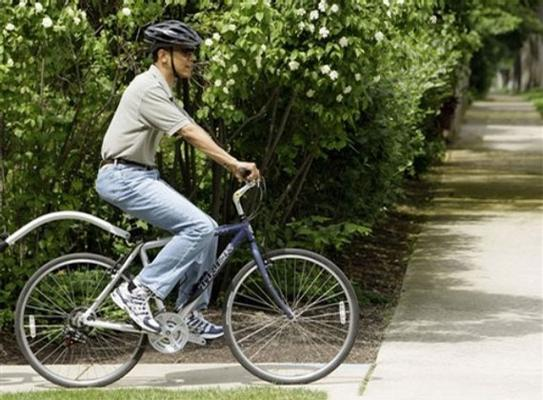

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_no = 234  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
cv2_imshow(img)

### preprocessing data

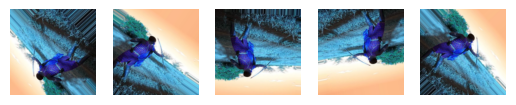

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

num_classes = 12
img_path = 'Stanford40/JPEGImages/'
# preprocessing
def preprocessing(files):
    dataset = []
    for file in files:
        img = cv2.imread(img_path + file)
        # either 112 or 224 should work really well
        # img = cv2.resize(img, (112, 112), interpolation=cv2.INTER_AREA) 
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA) 
        img = img/255.0
        # img = img.astype('float32')/255.0
        dataset.append(np.array(img))
    dataset = np.array(dataset)
    return dataset

# use 10% of train files as validation set
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files, 
                                          train_labels, 
                                          test_size=0.1,
                                          stratify= train_labels)
                                      

train_dataset = preprocessing(train_files)
test_dataset = preprocessing(test_files)
validation_dataset = preprocessing(validation_files)


# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
data_augmentor = ImageDataGenerator(
        # featurewise_center=False,  # set input mean to 0 over the dataset
        # samplewise_center=False,  # set each sample mean to 0
        # featurewise_std_normalization=False,  # divide inputs by std of the dataset
        # samplewise_std_normalization=False,  # divide each input by its std
        # zca_whitening=False,  # dimesion reduction
        rotation_range=50,  # randomly rotate images in the range
        # zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=0.1,  # randomly flip images
        vertical_flip=0.2  # randomly flip images
        )
  
data_augmentor.fit(train_dataset.reshape(len(train_dataset), 224, 224, 3))

# display data augmentation samples
# flow(
#     x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None,
#     save_to_dir=None, save_prefix='', save_format='png', subset=None
# )

augment = data_augmentor.flow(train_dataset.reshape(len(train_dataset), 224, 224, 3)[1:2], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()





In [ ]:
# transform class label into number code
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)
validation_labels = le.transform(validation_labels)
print("\n\n after label encoder:")
print("train labels: ", train_labels) # 2733 = 2459 + 274
print("validation labels: \n", len(validation_labels), validation_labels) # 274
print("test labels: ", test_labels) # 304

# if use categorical_crossentropy in compile(loss), one hot encoding is needed
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)
# validate_labels = to_categorical(validate_labels, num_classes)
print("\n\n after one hot encoding:")
print("train labels: \n", len(train_labels), train_labels)
print("validation labels: \n", len(validation_labels), validation_labels) 
print("test labels: \n", len( test_labels), test_labels)



 after label encoder:
train labels:  [8 8 0 ... 5 8 2]
validation labels: 
 274 [ 5  5  2  9  2  0  3  1  9  8  0  1  0  7  1  1  3  5  8 11 11  8  6  7
  0  8  3  7  8  2  6  7  5  0  9  9  5  0  2  7  2  2  2  2  5  9  3  7
  9  4  9  8  5  7 10  8  1  1  0  1  2  3 10  3  2  0  3 10  5  0  2 11
 11 10  5  4  9 10  2  5  5  5  1  5  3  0 11  4  6  5  2  3 11  7  2  1
  1  3  4  3  3 11  9  4  9  3  9  4  2  6  6  6 11  7 11  9  0  1  8 11
  3  1  7 10  5  0 10  8  7  5  7  4  5  6  3  1  2  0  6  0  8  1  7  2
  6  6  0 10  6  9  3 10  3  4  8  8  4  7  7  3  0  0  9  6  9  0 10  7
  4  8  9 10 10  4  1  4  1  4  6  0  5  3  2  9  8  3  1  6  8  5 10  6
  3  6  4  1  9  7 11  6  2  3  1  5 11  2  5  6  6  0 11  5 10  5  2 10
  2  8 10  6  5  0  0 10  3  4  5  0 11  1  6 11  1  6  3  0  0 11  7  6
  1  1  0  7  4 11  6  2 11  1  3  9  7  6  4 11 10  8  1  7  5  7  9  4
  7  6  8  3  1  9  6  1  9  8]
test labels:  [ 7  4  5  7  7  3  2  1  2  3 11  8 10  3  9  2  0  0 11  0  6 10  5

### VGG16

In [52]:
# from read_stanford40 import train_dataset, train_labels, \
#                             test_dataset, test_labels, \
#                             validation_dataset, validation_labels, \
#                             num_classes, keep_stanford40
import tensorflow as tf
from keras.applications import vgg16
from keras.applications import ResNet50
from keras.models import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, \
                         Flatten, Dense, GlobalAveragePooling2D
# optimizers
from tensorflow.python.keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam

import numpy as np
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

num_classes = 12

def define_model():
    # VGG16
    # vgg16_model = vgg16.VGG16(include_top=False,
    #                  weights='imagenet',
    #                  input_tensor=None,
    #                  input_shape=input_shape,
    #                  pooling='max',)
                     
    # # model.add(Dense(num_classes, activation="softmax"))
    # flatten_layer = Flatten()
    # dense_layer_1 = Dense(50, activation='relu')
    # dense_layer_2 = Dense(20, activation='relu')
    # prediction_layer = Dense(num_classes, activation='softmax')


    # model = Sequential([
    #     vgg16_model,
    #     flatten_layer,
    #     dense_layer_1,
    #     dense_layer_2,
    #     prediction_layer
    # ])
    
    # print(model.summary())
    # VGG 16
    # model = Sequential()     
    # # Input Conv1 Conv2 MaxPooling1
    # model.add(Input(shape=input_shape))
    # model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))
    # model.add(Dropout(0.25))
    

    # # Conv3 Conv4 MaxPooling2
    # model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))
    # model.add(Dropout(0.25))

    # # Conv5 Conv6 Conv7 MaxPooling3
    # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))
    # model.add(Dropout(0.25))

    # # Conv8 Conv9 Conv10 MaxPooling4
    # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))
    # model.add(Dropout(0.25))

    # # Conv11 Conv12 Conv13 MaxPooling5
    # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))
    # model.add(Dropout(0.4))

    # # Flatten1 Dense1 Dense2 Dense3 Output
    # model.add(Flatten())
    # model.add(Dense(4096, activation="relu"))
    # model.add(Dense(4096, activation="relu"))
    # model.add(Dense(num_classes, activation="softmax"))


    
    # # ResNet18
    # resNet18 = Sequential()
    # # ResNet50
    resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
    model = Sequential()
    model.add(resnet50)
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
        
    # model = Sequential()
    # model.add(Conv2D(32, (3, 3), activation='relu',  padding = 'same', kernel_initializer='he_normal', 
    #                  input_shape = input_shape))
    # model.add(MaxPooling2D((2, 2)))
    # model.add(BatchNormalization())

    # # Add dropouts to the model
    # model.add(Dropout(0.25))
    # model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
    # model.add(MaxPooling2D((2, 2)))
    # model.add(BatchNormalization())
    # # Add dropouts to the model
    # model.add(Dropout(0.25))
    # model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
    # model.add(BatchNormalization())
    # # Add dropouts to the model
    # model.add(Dropout(0.4))
    # # add Dense Layer
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))
    # model.add(BatchNormalization())
    # # Add dropouts to the model
    # model.add(Dropout(0.3))
    # model.add(Dense(num_classes, activation='softmax'))
    
    return model
    




input_shape = (224, 224, 3)
model = define_model()

# print model structure and details
model.summary() 

# plot the model
tf.keras.utils.plot_model(model, to_file='model.png')
tf.keras.utils.plot_model(model, show_shapes = True, to_file='model_shape.png')


# Compile
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# model.compile(optimizer=optimizer,
#           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#           metrics=['accuracy'])
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    # For every 5 epoch, learning rate decreases to the 1/2 * previous learning rate
    if epoch % 5 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.5)
        print("lr changed to {}".format(lr * 0.5))
    return K.get_value(model.optimizer.lr)
 

reduce_lr = tf.keras.callbacks.LearningRateScheduler(schedule=scheduler)

# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])


# try early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

history = model.fit(train_dataset, 
            train_labels, 
            validation_data=(validation_dataset, validation_labels), 
            epochs=70,
            callbacks=[es, reduce_lr])
model.save('Model/Stanford40_Frames.h5')






Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_12 (Flatten)        (None, 100352)            0         
                                                                 
 dense_21 (Dense)            (None, 12)                1204236   
                                                                 
Total params: 24,791,948
Trainable params: 24,738,828
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/70
77/77 [==============================] - 59s 332ms/step - loss: 4.7820 - accuracy: 0.3188 - val_loss: 15.8090 - val_accuracy: 0.0839 - lr: 0.0010
Epoch 2/70
77/77 [==============================] - 24s 312ms/step - loss: 1.9036 - accuracy: 0.4864 - val_loss: 3.3260 - val_accuracy: 0.0657 

### save model to google drive

In [64]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# 


Mounted at /content/drive


In [67]:
!mkdir /content/gdrive/My\ Drive/Colab_Models
model.save('gdrive/My Drive/Colab_Models/Stanford40_Frames.h5')
model.save_weights("gdrive/My Drive/Colab_Models/Stanford40_Frames_weights.h5")

In [68]:
from google.colab import files
files.download('/content/gdrive/My Drive/Colab_Models/Stanford40_Frames_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### evaluate test accuracy & loss

In [53]:
# evaluate test accuracy & loss
test_loss, test_acc = model.evaluate(test_dataset, test_labels, verbose=2)
print('Test Loss : {:.4f}'.format(test_loss))
print('Test Accuracy : {:.4f}'.format(test_acc))

10/10 - 2s - loss: 2.3833 - accuracy: 0.5625 - 2s/epoch - 169ms/step
Test Loss : 2.3833
Test Accuracy : 0.5625


### Train Validation Acc & Loss

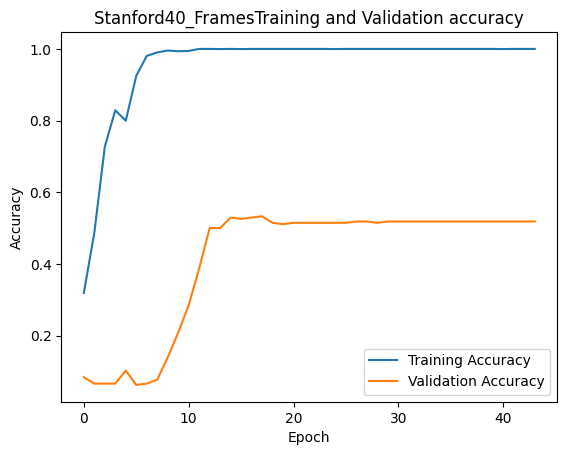

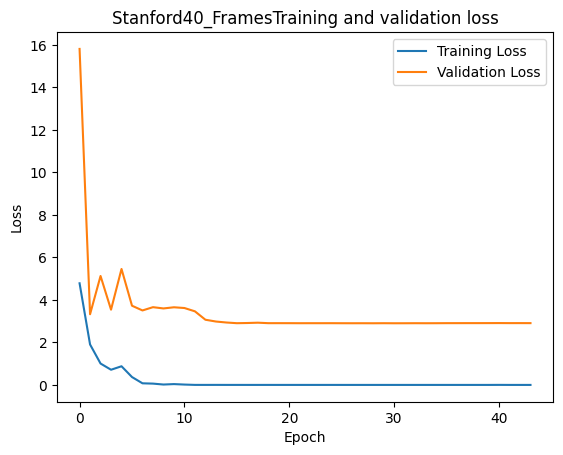

In [54]:

def plot_curves(history, model_name):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(model_name + 'Training and Validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(model_name + 'Training and validation loss')
    plt.legend()
    plt.show()



# plot training and validation accuracy, loss.
plot_curves(history=history, 
            model_name = "Stanford40_Frames")


### Confusion Matrix

10/10 [==============================] - 1s 95ms/step


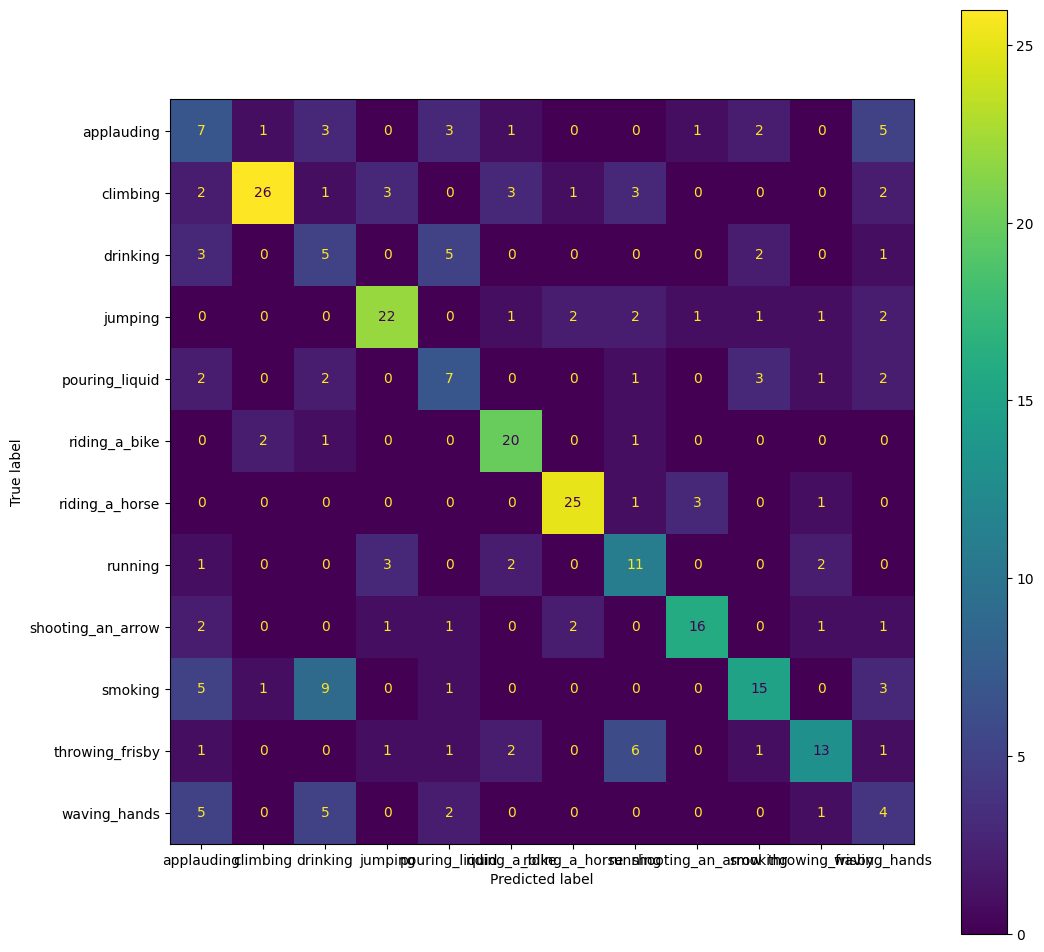

In [57]:

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#Make predictions
y_probs = model.predict(test_dataset)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
# # convert one hot encoded labels to single-digit ones
rounded_labels = np.argmax(test_labels, axis=1)
#Confusion matrix
cm=confusion_matrix(y_preds, rounded_labels)
# cm=confusion_matrix(y_preds, test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = keep_stanford40)
fig, ax = plt.subplots(figsize=(num_classes, num_classes))
disp.plot(ax=ax)
plt.show()
    


# Human Motion Database 51 (HMDB51)
### Download the dataset

In [ ]:
# Download HMDB51 data and splits from serre lab website
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar

--2023-04-06 09:25:34--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Resolving serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)... 128.148.254.114
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar [following]
--2023-04-06 09:25:34--  https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124008126 (2.0G)
Saving to: ‘hmdb51_org.rar’

hmdb51_org.rar      100%[===================>]   1.98G  12.5MB/s    in 3m 40s  

2023-04-06 09:29:15 (9.20 MB/s) - ‘hmdb51_org.rar’ saved [2124008126/2124008126]

--2023-04-06 09:29:16--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar
R

# Extract and organize the data.

In [ ]:
! mkdir -p video_data test_train_splits
! unrar e test_train_splits.rar test_train_splits
! rm test_train_splits.rar
! unrar e hmdb51_org.rar 
! rm hmdb51_org.rar
! mv *.rar video_data
import os
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]
for files in os.listdir('video_data'):
    foldername = files.split('.')[0]
    if foldername in keep_hmdb51:
      # extract only the relevant classes for the assignment.
      os.system("mkdir -p video_data/" + foldername)
      os.system("unrar e video_data/"+ files + " video_data/"+foldername)

! rm video_data/*.rar



UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from test_train_splits.rar


Would you like to replace the existing file test_train_splits/brush_hair_test_split1.txt
  7194 bytes, modified on 2010-12-13 16:16
with a new one
  7194 bytes, modified on 2010-12-13 16:16

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  test_train_splits/brush_hair_test_split1.txt                   0%  OK 
Extracting  test_train_splits/brush_hair_test_split2.txt                   1%  OK 
Extracting  test_train_splits/brush_hair_test_split3.txt                   1%  OK 
Extracting  test_train_splits/cartwheel_test_split1.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split2.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split3.txt                    3%  OK 
Extracting  test_train_splits/catch_test_split1.txt                        4%  OK 


# Split the dataset into train and test 

In [ ]:
import glob

TRAIN_TAG, TEST_TAG = 1, 2
train_files, test_files = [], []
train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('/')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files.append(video_filename)
            train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['ALeapToFreedom_ride_horse_f_cm_np1_le_med_2.avi', 'ALeapToFreedom_ride_horse_f_cm_np1_ri_med_3.avi', 'ALeapToFreedom_ride_horse_f_nm_np1_ri_med_0.avi', 'ALeapToFreedom_ride_horse_f_nm_np1_ri_med_4.avi', 'Alifestyle_ride_horse_f_cm_np1_fr_med_4.avi', 'Alifestyle_ride_horse_f_cm_np1_le_med_0.avi', 'Alifestyle_ride_horse_f_cm_np1_le_med_2.avi', 'Alifestyle_ride_horse_f_cm_np1_le_med_5.avi', 'Alifestyle_ride_horse_f_cm_np1_ri_med_1.avi', 'Alifestyle_ride_horse_f_cm_np1_ri_med_3.avi', 'Alifestyle_ride_horse_f_cm_np1_ri_med_6.avi', 'BackBreakingFun_ride_horse_f_cm_np1_ba_med_1.avi', 'BackBreakingFun_ride_horse_f_cm_np1_le_med_0.avi', 'BackBreakingFun_ride_horse_f_cm_np1_le_med_2.avi', 'Caspar_ride_horse_f_cm_np1_le_med_5.avi', 'Caspar_ride_horse_f_cm_np1_ri_med_0.avi', 'Caspar_ride_horse_f_cm_np1_ri_med_1.avi', 'Caspar_ride_horse_f_cm_np1_ri_med_2.avi', 'Caspar_ride_horse_f_cm_np1_ri_med_3.avi', 'Caspar_ride_horse_f_cm_np1_ri_med_4.avi', 'ChampagneRunattheParkHT_ride_ho